In [1]:
from rich_exploration import *


alpha=0.05
target='logerror'



In [2]:



partitionslist=partitionslist_with_scaled(scaled_vars = ['latitude', 'longitude', 'bathroomcnt', 'taxrate'])


We dropped 1765 rows


In [3]:

#Explore 

train_la=partitionslist[0][0]
orange_train=partitionslist[1][0]
ventura_train=partitionslist[2][0]


Question 1:

Is there a correlation between square footage of a home and log error?



In [4]:
pearsonsRsquareLogError(train_la,'structure_dollar_sqft_bin')


H_{0}

'There is zero correlation according to Pearson R '

Reject~H_{0}~?

Yes, we observe that structure_dollar_sqft_bin and logerror show observable correlation by pearsons R:
Our r value is:-0.037313842378547436
Hence, we reject our null hypothesis




Question 2:

Is there a relationship between tax rate and log error?


In [5]:
pearsonsRsquareLogError(train_la,'taxrate')


H_{0}

'There is zero correlation according to Pearson R '

Reject~H_{0}~?

Yes, we observe that taxrate and logerror show observable correlation by pearsons R:
Our r value is:0.02020590097180137
Hence, we reject our null hypothesis




Question 3:

Does log error vary by when the house was sold?

different 2-combos count:116
vs
same 2-combos count:1537 


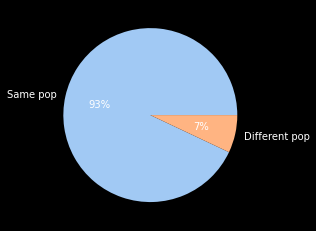

In [6]:
interestingcols=['age']
samepopdict,diffpopdict,lengthsame,lengthdiff=granulartwocombocomparison(train_la,interestingcols,target,n=100)



ageandlogrelpie(lengthsame,lengthdiff)

Since age is actually a categorical, we explored every unique age with a sample size of greater than 100.

(a conservative sample size to ensure our tests are significant).

 We ran the levene test then a ttest for indpendence respective to the levene test results. The net results give us a bit more detail than an ANOVA which would allow for deeper inspection.
 
 Considering an ANOVA only would answer if any of the samples differ, we can see that it is the case that our logerror overwhelmingly does not vary with age (in LA county).

Question 4,5,6:


Is Log error is significantly different among the counties of LA County, Orange County and Ventura County?

We actually ask three seperate questions here as we compare LA to OC, LA to Ventura and Ventura to OC.


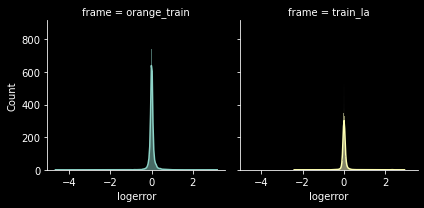

H_{0}

'The null hypothesis is that our populations are statistically the same.'

Reject~H_{0}~?

No, we observe that orange_train and train_la are statistically the same:
Hence, we fail to reject our null hypothesis




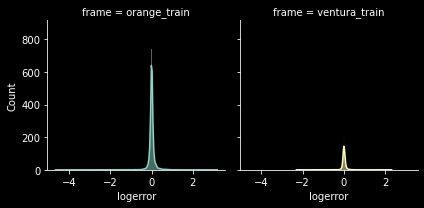

H_{0}

'The null hypothesis is that our populations are statistically the same.'

Reject~H_{0}~?

No, we observe that orange_train and ventura_train are statistically the same:
Hence, we fail to reject our null hypothesis




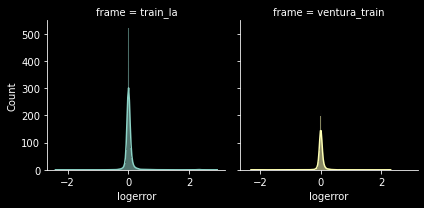

H_{0}

'The null hypothesis is that our populations are statistically the same.'

Reject~H_{0}~?

Yes, we observe that train_la and ventura_train are statistically different
Hence, we reject our null hypothesis




In [7]:
threeQandA_stats_viz_counties(train_la,orange_train,ventura_train)
    

We see that LA and OC come from statistically different populations. However Ventura is not indepedent of LA or OC. 

It should be noted that the sizes of these subpopulations differ by a large degree. As we represent with the pie chart below.

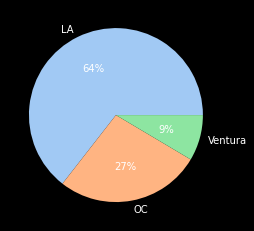

In [8]:
county_train_pie(train_la,orange_train,ventura_train)

In [9]:
X=partitionslist[0][1:4]

train=partitionslist[0][0]

In [10]:






# list of variables I will cluster on. 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)





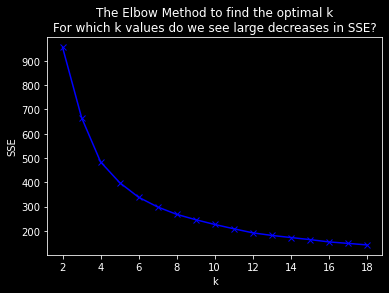

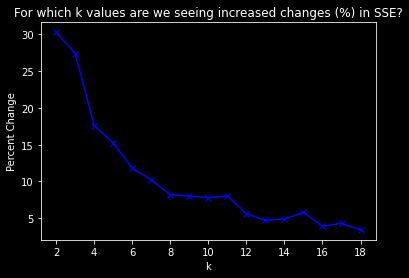

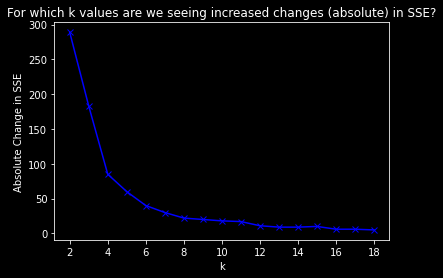

In [11]:


find_k(X[0], cluster_vars, k_range)



k = 5
# as reminders: 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'

kmeans = create_clusters(X[0], k, cluster_vars)





It appears that k such that k equals 6,7 or 8 is my best  fit.

I am not sure how to obtain that k....

In [12]:

centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)
centroid_df


,area_cluster,centroid_scaled_latitude,centroid_scaled_longitude,centroid_age_bin
0,0,0.374394,0.539382,0.441321
1,1,0.493545,0.499519,0.622766
2,2,0.592451,0.326064,0.376646
3,3,0.872779,0.617564,0.236948
4,4,0.486534,0.780624,0.395415


In [13]:




X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df,X)


In [14]:

pd.DataFrame(X[0].groupby(['area_cluster', 'centroid_scaled_latitude', 'centroid_scaled_longitude', 
                           'centroid_age_bin'])['area_cluster'].count())




,,,,area_cluster
area_cluster,centroid_scaled_latitude,centroid_scaled_longitude,centroid_age_bin,
0,0.374394,0.539382,0.441321,4501
1,0.493545,0.499519,0.622766,3833
2,0.592451,0.326064,0.376646,4645
3,0.872779,0.617564,0.236948,2018
4,0.486534,0.780624,0.395415,3296


In [15]:

cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
k_range = range(2,20)



In [16]:
X[0][cluster_vars].isna().sum()

scaled_bathroomcnt    0
sqft_bin              0
acres_bin             0
bath_bed_ratio        0
dtype: int64

In [32]:


k=7
cluster_name = 'size_cluster'
cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']

# fit kmeans 
kmeans = create_clusters(X[0], k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df,X)







X_train = X[0].iloc[:,0:27]

xtrainlist=X_train.columns.to_list()
# xtrainlist


['bathroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_sqft_bin',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio',
 'cola',
 'scaled_latitude',
 'scaled_longitude',
 'scaled_bathroomcnt',
 'scaled_taxrate',
 'area_cluster',
 'centroid_scaled_latitude',
 'centroid_scaled_longitude',
 'centroid_age_bin',
 'size_cluster',
 'centroid_scaled_bathroomcnt',
 'centroid_sqft_bin',
 'centroid_acres_bin',
 'centroid_bath_bed_ratio']

In [90]:


pd.DataFrame(X_train[X_train.size_cluster==6].groupby(['size_cluster', 'centroid_scaled_bathroomcnt', 'centroid_sqft_bin',
                              'centroid_acres_bin', 'centroid_bath_bed_ratio'])['size_cluster'].count())



,,,,,size_cluster
size_cluster,centroid_scaled_bathroomcnt,centroid_sqft_bin,centroid_acres_bin,centroid_bath_bed_ratio,
6,0.316457,0.546822,0.220682,0.708589,2785


In [89]:
# grp1=X_train.groupby(['size_cluster', 'centroid_scaled_bathroomcnt', 'centroid_sqft_bin',
#                               'centroid_acres_bin', 'centroid_bath_bed_ratio'])['size_cluster']



(6,
 0.31645721125074855,
 0.5468222621184924,
 0.2206822262118493,
 0.708588526972728)

In [ ]:

# list(grp1.groups.keys())[-1]

In [82]:
# pd.DataFrame(grp1.groups.get((6, 0.31645721125074855, 0.5468222621184924, 0.2206822262118493, 0.708588526972728)))



,0
0,50018
1,49361
2,6359
3,627
4,33237
...,...
2780,18760
2781,35705
2782,47592
2783,17663


In [19]:

# plt.figure(figsize=(12,6))
# plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
# plt.scatter(y=X_train.age, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)



In [20]:

y_train = partitionslist[0][-3]


# y_train

In [21]:


# plt.scatter(y=y_train.logerror, x=X_train.age, c=X_train.area_cluster, alpha=.7)
# plt.ylim(-1,1)
# plt.xlabel('Age of Property')
# plt.ylabel('Log Error of Zestimate')
# plt.title("Do clusters reveal differences in age and error?")



In [22]:



# sns.boxplot(y=y_train.logerror, x=X_train.area_cluster)
# plt.ylim(-1, 1)
# # sns.swarmplot(X_train.age_bin, y_train.logerror, hue=X_train.area_cluster)

# plt.figure(figsize=(12,6))
# # plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
# plt.scatter(y=y_train.logerror, x=X_train.calculatedfinishedsquarefeet, c=X_train.size_cluster, alpha=.7)
# plt.yscale('symlog')
# plt.xlabel('Finished Square Feet')
# plt.ylabel('Log Error of Zestimate')
# plt.title('Is there distinction between clusters when visualizing size of the home by the error in zestimate?')

# plt.show()



In [23]:


plt_df = X_train[['bathroomcnt', 'calculatedfinishedsquarefeet', 
                    'acres', 'bath_bed_ratio', 'size_cluster']]

# sns.pairplot(data=plt_df, hue='size_cluster')



# sns.scatterplot(x='bath_bed_ratio', y='calculatedfinishedsquarefeet', 
#                 data=X_train, hue='size_cluster')

# update datatypes of binned values to be float
X_train = X_train.astype({'size_cluster': 'category', 'area_cluster': 'category'})


dummy_df = pd.get_dummies(X_train[['size_cluster','area_cluster']], dummy_na=False, drop_first=[True, True])

# append dummy df cols to the original df. 
X_train = pd.concat([X_train, dummy_df], axis=1)


# plt.scatter(X_train.longitude, X_train.latitude, c = X_train.area_cluster)



In [24]:

# X_train.groupby(['area_cluster_id', 'size_cluster_id'])['structure_dollar_per_sqft']
X_train.head()

,bathroomcnt,calculatedfinishedsquarefeet,latitude,longitude,age,age_bin,taxrate,acres,acres_bin,sqft_bin,...,size_cluster_1,size_cluster_2,size_cluster_3,size_cluster_4,size_cluster_5,size_cluster_6,area_cluster_1,area_cluster_2,area_cluster_3,area_cluster_4
38748,3.0,1264.0,33976419.0,-118301352.0,94.0,0.666,1.217797,0.107415,0.1,0.3,...,0,0,0,0,0,0,1,0,0,0
19330,2.0,1300.0,34120981.0,-118346117.0,58.0,0.400,1.208293,0.281566,0.3,0.3,...,0,0,0,0,0,0,1,0,0,0
46192,5.0,2872.0,34141910.0,-118433056.0,90.0,0.600,1.242053,0.200964,0.2,0.6,...,0,0,0,0,0,0,1,0,0,0
22550,2.0,1344.0,34105184.0,-118377389.0,65.0,0.466,1.201040,0.080372,0.0,0.3,...,0,0,0,0,0,0,1,0,0,0
45428,4.0,3730.0,34125421.0,-118030828.0,28.0,0.200,1.146520,0.194812,0.2,0.7,...,0,0,0,0,0,0,1,0,0,0


In [30]:
for i in X:
    print(i.columns)
    display(i.area_cluster.max())




Index(['bathroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'age', 'age_bin', 'taxrate', 'acres', 'acres_bin', 'sqft_bin',
       'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'bath_bed_ratio',
       'cola', 'scaled_latitude', 'scaled_longitude', 'scaled_bathroomcnt',
       'scaled_taxrate', 'area_cluster', 'centroid_scaled_latitude',
       'centroid_scaled_longitude', 'centroid_age_bin', 'size_cluster',
       'centroid_scaled_bathroomcnt', 'centroid_sqft_bin',
       'centroid_acres_bin', 'centroid_bath_bed_ratio'],
      dtype='object')


4

Index(['bathroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'age', 'age_bin', 'taxrate', 'acres', 'acres_bin', 'sqft_bin',
       'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'bath_bed_ratio',
       'cola', 'scaled_latitude', 'scaled_longitude', 'scaled_bathroomcnt',
       'scaled_taxrate', 'area_cluster', 'centroid_scaled_latitude',
       'centroid_scaled_longitude', 'centroid_age_bin', 'size_cluster',
       'centroid_scaled_bathroomcnt', 'centroid_sqft_bin',
       'centroid_acres_bin', 'centroid_bath_bed_ratio'],
      dtype='object')


4

Index(['bathroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'age', 'age_bin', 'taxrate', 'acres', 'acres_bin', 'sqft_bin',
       'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'bath_bed_ratio',
       'cola', 'scaled_latitude', 'scaled_longitude', 'scaled_bathroomcnt',
       'scaled_taxrate', 'area_cluster', 'centroid_scaled_latitude',
       'centroid_scaled_longitude', 'centroid_age_bin', 'size_cluster',
       'centroid_scaled_bathroomcnt', 'centroid_sqft_bin',
       'centroid_acres_bin', 'centroid_bath_bed_ratio'],
      dtype='object')


4